In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("C:\\Users\\panda\\Documents\\machine_learning\\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, weights):
    return sigmoid(np.dot(X, weights))

def loss(y, y_pred):
    epsilon = 1e-10
    return -np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))

def train(X, y, lr=0.01, epochs=2000):
    weights = np.zeros((X.shape[1], 1))
    y = y.reshape(-1, 1)

    for i in range(epochs):
        y_pred = predict(X, weights)
        error = y_pred - y
        grad = np.dot(X.T, error) / X.shape[0]
        weights -= lr * grad

    return weights

weights = train(X_train, y_train, lr=0.01, epochs=2000)

y_pred_test = predict(X_test, weights)
y_label_test = (y_pred_test >= 0.5).astype(int)

w0, w1, w2 = weights.ravel()
print(f"w0 = {w0:.4f}, w1 = {w1:.4f}, w2 = {w2:.4f}")


w0 = -0.8034, w1 = 1.7320, w2 = 0.9408


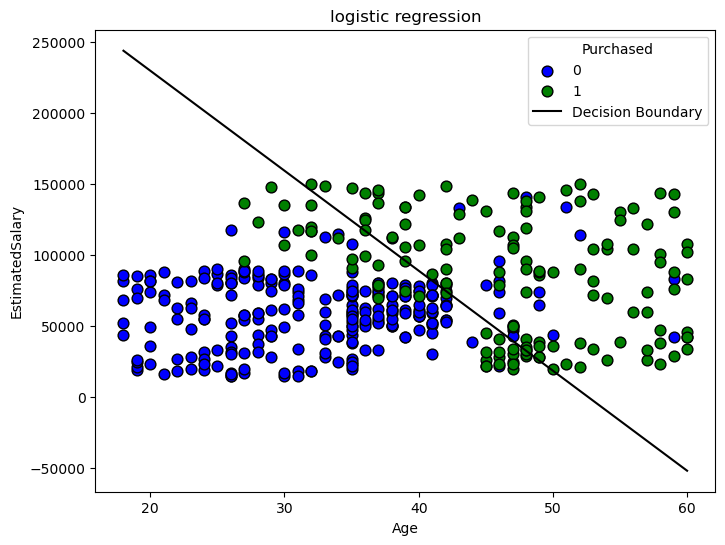

In [87]:
plt.figure(figsize=(8, 6))

X= df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

for label, color in zip([0, 1], ['blue', 'green']):
    plt.scatter(
        X[y == label, 0],  
        X[y == label, 1], 
        c=color,
        label=str(label),
        edgecolor='k',
        s=60
    )

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x1_scaled = (x1 - scaler.mean_[0]) / scaler.scale_[0]
x2_scaled = -(w0 + w1 * x1_scaled) / w2
x2 = x2_scaled * scaler.scale_[1] + scaler.mean_[1]

plt.plot(x1, x2, color='black', label='Decision Boundary')

plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.title("logistic regression")
plt.legend(title="Purchased")
plt.show()



In [101]:
from sklearn.linear_model import LogisticRegression

X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

#분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred_test = model.predict_proba(X_test)[:, 1]  
y_label_test = (y_pred_test >= 0.5).astype(int)  # 분류

w0 = model.intercept_[0]
w1, w2 = model.coef_[0]

print(f"scikit-learn 로지스틱 회귀 파라미터:")
print(f"w0 = {w0:.4f}, w1 = {w1:.4f}, w2 = {w2:.4f}")

scikit-learn 로지스틱 회귀 파라미터:
w0 = -1.0531, w1 = 2.0129, w2 = 1.1232


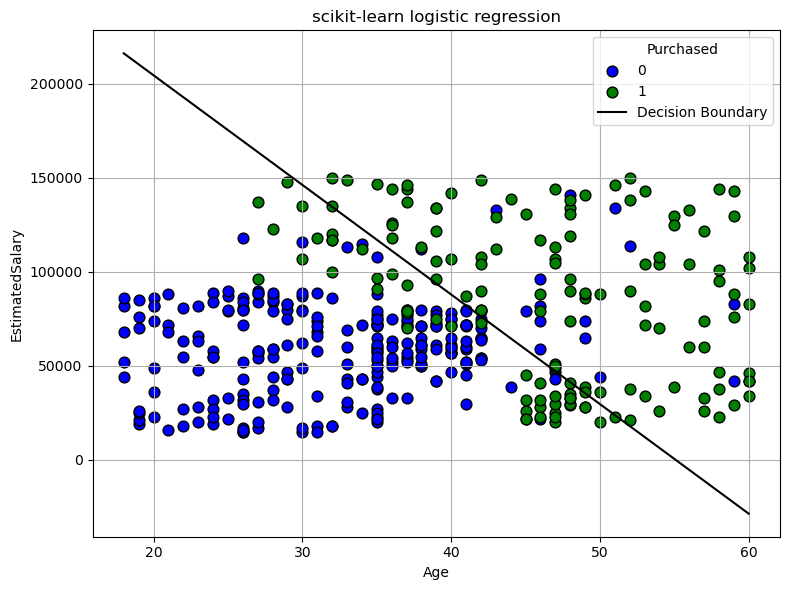

In [105]:
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

plt.figure(figsize=(8, 6))

for label, color in zip([0, 1], ['blue', 'green']):
    plt.scatter(
        X[y == label, 0],
        X[y == label, 1],
        c=color,
        label=str(label),
        edgecolor='k',
        s=60
    )

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x1_scaled = (x1 - scaler.mean_[0]) / scaler.scale_[0]
x2_scaled = -(w0 + w1 * x1_scaled) / w2
x2 = x2_scaled * scaler.scale_[1] + scaler.mean_[1]

plt.plot(x1, x2, label='Decision Boundary', color='black')
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.title("scikit-learn logistic regression")
plt.legend(title="Purchased")
plt.grid(True)
plt.tight_layout()
plt.show()
